In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv(r"C:\Users\sunny\Downloads\Flight_fare_Project\Project Code and Files\flight data.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.shape

(10683, 11)

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [6]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### EDA

In [7]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

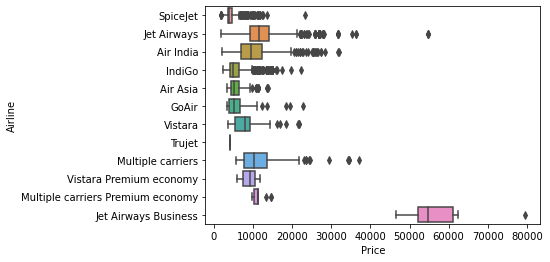

In [8]:
sns.boxplot(x='Price',y='Airline',data=df.sort_values('Price'))
plt.show()

### Jet Airways Business have the Hifgest Fare

In [9]:
df['Source'].value_counts() 

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

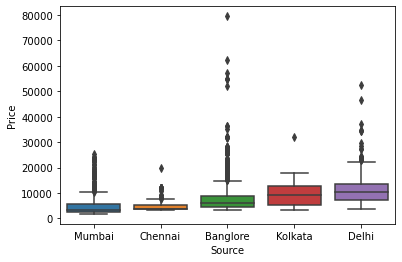

In [10]:
sns.boxplot(y='Price',x='Source',data=df.sort_values('Price'))
plt.show()

In [11]:
df['Destination'].value_counts() 

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

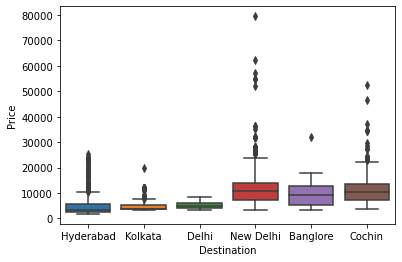

In [12]:
sns.boxplot(y='Price',x='Destination',data=df.sort_values('Price'))
plt.show()

In [13]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [14]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

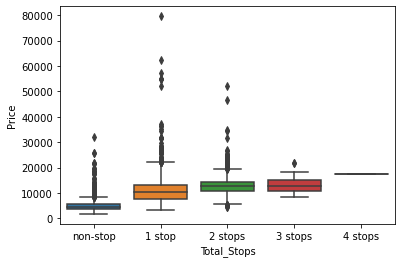

In [15]:
sns.boxplot(y='Price',x='Total_Stops',data=df.sort_values('Price'))
plt.show()

In [16]:
df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [17]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

### Feature Engineering

In [18]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [19]:
df["journey_day"] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.day
df["journey_month"] = pd.to_datetime(df.Date_of_Journey, format = '%d/%m/%Y').dt.month
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [20]:
df["Dep_hour"] = pd.to_datetime(df.Dep_Time).dt.hour
df["Dep_Minute"] = pd.to_datetime(df.Dep_Time).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [21]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_Minute"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
df.drop(columns=['Dep_Time','Date_of_Journey'],inplace=True)

In [23]:
df.drop(columns='Arrival_Time',inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
journey_day         int64
journey_month       int64
Dep_hour            int64
Dep_Minute          int64
Arrival_hour        int64
Arrival_Minute      int64
dtype: object

In [26]:
Airline = df["Airline"]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
Source = df["Source"]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [28]:
Destination = df["Destination"]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [29]:
df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [30]:
df.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)

In [31]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,13302,1,3,16,50,21,35


In [32]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [33]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [34]:
df.head(10)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,21,35
5,SpiceJet,Kolkata,Banglore,2h 25m,0,3873,24,6,9,0,11,25
6,Jet Airways,Banglore,New Delhi,15h 30m,1,11087,12,3,18,55,10,25
7,Jet Airways,Banglore,New Delhi,21h 5m,1,22270,1,3,8,0,5,5
8,Jet Airways,Banglore,New Delhi,25h 30m,1,11087,12,3,8,55,10,25
9,Multiple carriers,Delhi,Cochin,7h 50m,1,8625,27,5,11,25,19,15


In [35]:
df = pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_Minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,2h 50m,0,3897,24,3,22,20,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,7h 25m,2,7662,1,5,5,50,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,19h,2,13882,9,6,9,25,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,5h 25m,1,6218,12,5,18,5,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,4h 45m,1,13302,1,3,16,50,...,0,0,0,0,0,0,0,0,0,1


In [36]:
df.drop(columns=['Airline','Source','Destination'],inplace=True)

In [37]:
df.head()

,Duration,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,2h 50m,0,3897,24,3,22,20,1,10,0,...,0,0,0,0,0,0,0,0,0,1
1,7h 25m,2,7662,1,5,5,50,13,15,1,...,0,0,0,1,0,0,0,0,0,0
2,19h,2,13882,9,6,9,25,4,25,0,...,0,0,1,0,0,1,0,0,0,0
3,5h 25m,1,6218,12,5,18,5,23,30,0,...,0,0,0,1,0,0,0,0,0,0
4,4h 45m,1,13302,1,3,16,50,21,35,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df1=df.copy()

In [39]:
df.drop(columns='Duration',inplace=True)

In [40]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df.dtypes

Total_Stops                          int64
Price                                int64
journey_day                          int64
journey_month                        int64
Dep_hour                             int64
Dep_Minute                           int64
Arrival_hour                         int64
Arrival_Minute                       int64
Air India                            uint8
GoAir                                uint8
IndiGo                               uint8
Jet Airways                          uint8
Jet Airways Business                 uint8
Multiple carriers                    uint8
Multiple carriers Premium economy    uint8
SpiceJet                             uint8
Trujet                               uint8
Vistara                              uint8
Vistara Premium economy              uint8
Chennai                              uint8
Delhi                                uint8
Kolkata                              uint8
Mumbai                               uint8
Cochin     

## Test Data

In [42]:
df_test= pd.read_csv(r"C:\Users\sunny\Downloads\Flight_fare_Project\Project Code and Files\flight test.csv")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [43]:
df_test.shape

(2671, 10)

In [44]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [45]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [46]:
df_test['Source'].value_counts() 

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [47]:
df_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [48]:
df_test['Duration'].value_counts()

2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: Duration, Length: 320, dtype: int64

### Feature Engineering

In [49]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [50]:
df_test["journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format = '%d/%m/%Y').dt.day
df_test["journey_month"] = pd.to_datetime(df_test.Date_of_Journey, format = '%d/%m/%Y').dt.month
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [51]:
df_test["Dep_hour"] = pd.to_datetime(df_test.Dep_Time).dt.hour
df_test["Dep_Minute"] = pd.to_datetime(df_test.Dep_Time).dt.minute
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_Minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55


In [52]:
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_Minute"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6,23,55,2,45


In [53]:
df_test.drop(columns=['Dep_Time','Date_of_Journey','Arrival_Time'],inplace=True)

In [54]:
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45


In [55]:
Airline = df_test["Airline"]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [56]:
Source = df_test["Source"]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [57]:
Destination = df_test["Destination"]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [58]:
df_test = pd.concat([df_test,Airline,Source,Destination],axis=1)
df_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,21,5,8,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,BLR → DEL,2h 50m,non-stop,No info,24,6,23,...,0,0,0,0,0,0,1,0,0,0


In [59]:
df_test.drop(columns=['Airline','Source','Destination'],inplace=True)
df_test.head()

,Route,Duration,Total_Stops,Additional_Info,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,DEL → BOM → COK,10h 55m,1 stop,No info,6,6,17,30,4,25,...,0,0,1,0,0,1,0,0,0,0
1,CCU → MAA → BLR,4h,1 stop,No info,12,5,6,20,10,20,...,0,0,0,1,0,0,0,0,0,0
2,DEL → BOM → COK,23h 45m,1 stop,In-flight meal not included,21,5,19,15,19,0,...,0,0,1,0,0,1,0,0,0,0
3,DEL → BOM → COK,13h,1 stop,No info,21,5,8,0,21,0,...,0,0,1,0,0,1,0,0,0,0
4,BLR → DEL,2h 50m,non-stop,No info,24,6,23,55,2,45,...,0,0,0,0,0,0,1,0,0,0


In [60]:
df_test.drop(columns=['Route','Additional_Info'],axis=1,inplace=True)
df_test.head()

,Duration,Total_Stops,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,10h 55m,1 stop,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,4h,1 stop,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23h 45m,1 stop,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,13h,1 stop,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2h 50m,non-stop,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
df_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [62]:
df_test.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [63]:
df_test.head()

,Duration,Total_Stops,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,10h 55m,1,6,6,17,30,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
1,4h,1,12,5,6,20,10,20,0,0,...,0,0,0,1,0,0,0,0,0,0
2,23h 45m,1,21,5,19,15,19,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,13h,1,21,5,8,0,21,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,2h 50m,0,24,6,23,55,2,45,0,0,...,0,0,0,0,0,0,1,0,0,0


In [64]:
df2=df_test.copy()

In [65]:
df_test.drop(columns='Duration',inplace=True)

In [66]:
df_test.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,GoAir,IndiGo,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [67]:
df.head()

,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,GoAir,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,0,0,...,0,0,0,0,0,0,0,0,0,1


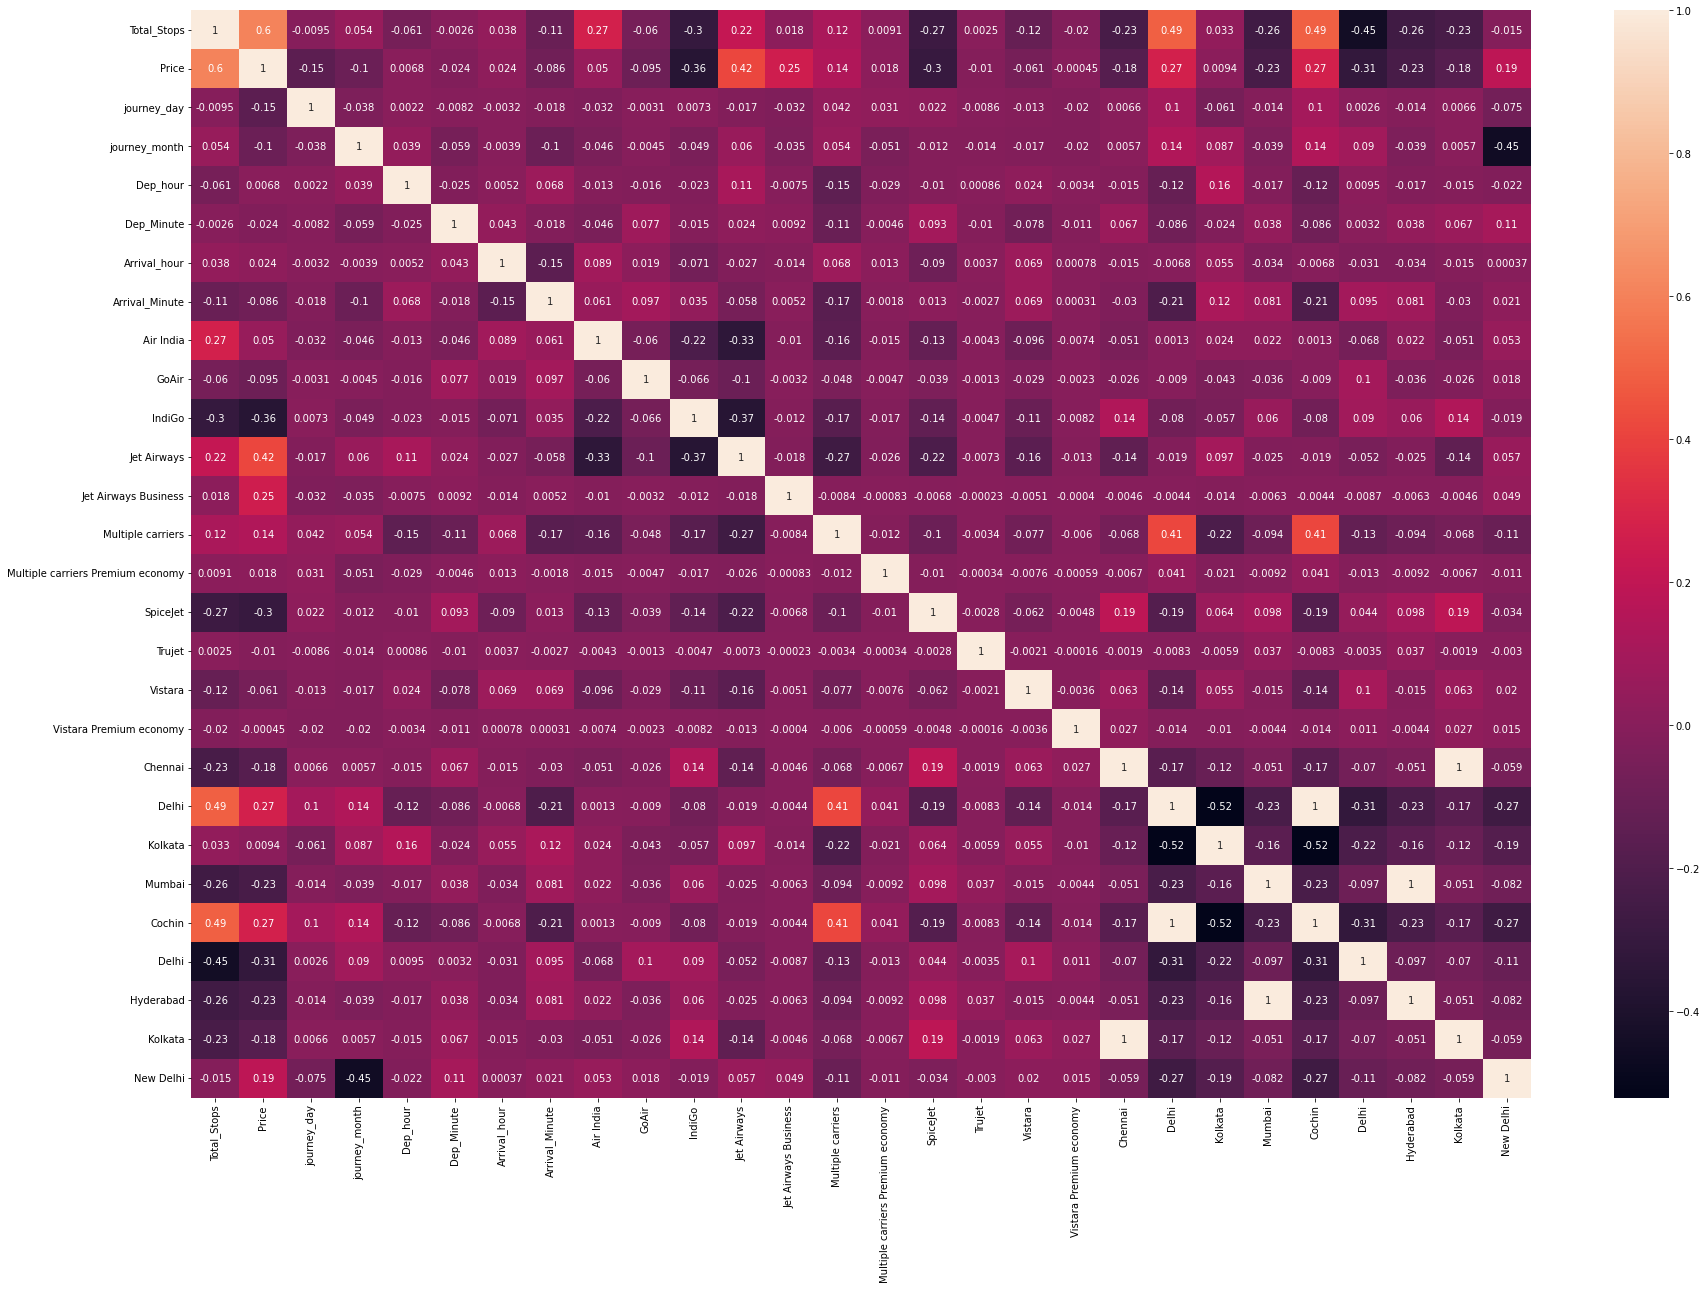

In [68]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
df.shape,df_test.shape

((10682, 28), (2671, 26))

In [70]:
x = df.drop(columns='Price',axis=1)
y=df["Price"]
x.head()

,Total_Stops,journey_day,journey_month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_Minute,Air India,GoAir,IndiGo,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [71]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Feature Selection

### Now it is time for us to select the features which are of the most importance

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [74]:
regressor = RandomForestRegressor()
regressor.fit(x,y)

RandomForestRegressor()

In [75]:
imp_feat = pd.DataFrame({"var":x.columns,"imp":regressor.feature_importances_}).sort_values(by=["imp"],ascending=False)
imp_feat

,var,imp
0,Total_Stops,0.418815
1,journey_day,0.141104
10,Jet Airways,0.077533
11,Jet Airways Business,0.059932
2,journey_month,0.058492
3,Dep_hour,0.046022
5,Arrival_hour,0.045593
4,Dep_Minute,0.030492
6,Arrival_Minute,0.027286
26,New Delhi,0.022625


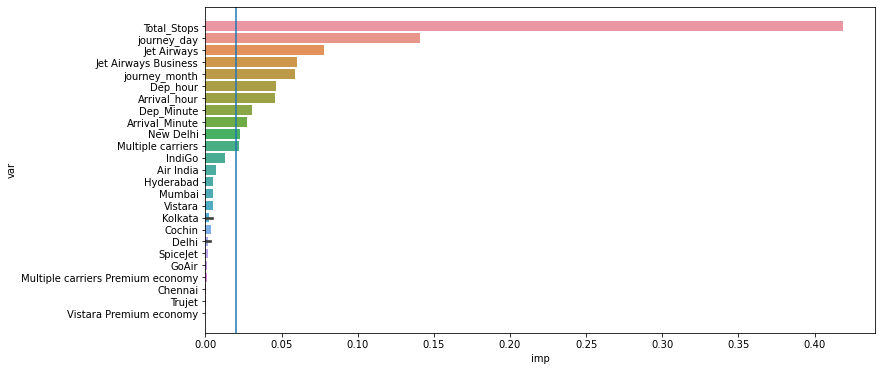

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x="imp",y="var",data=imp_feat)
plt.axvline(x=0.02)
plt.plot()
plt.show()

In [77]:
selected_var=imp_feat[imp_feat["imp"]>0.02]["var"].to_list()
selected_var

['Total_Stops',
 'journey_day',
 'Jet Airways',
 'Jet Airways Business',
 'journey_month',
 'Dep_hour',
 'Arrival_hour',
 'Dep_Minute',
 'Arrival_Minute',
 'New Delhi',
 'Multiple carriers']

In [78]:
selected_var=df[['Total_Stops',
 'journey_day',
 'Jet Airways',
 'Jet Airways Business',
 'journey_month',
 'Arrival_hour',
 'Dep_hour',
 'Dep_Minute',
 'Arrival_Minute',
 'New Delhi',
 'Multiple carriers']]
selected_var.shape

(10682, 11)

In [79]:
selected_var

,Total_Stops,journey_day,Jet Airways,Jet Airways Business,journey_month,Arrival_hour,Dep_hour,Dep_Minute,Arrival_Minute,New Delhi,Multiple carriers
0,0,24,0,0,3,1,22,20,10,1,0
1,2,1,0,0,5,13,5,50,15,0,0
2,2,9,1,0,6,4,9,25,25,0,0
3,1,12,0,0,5,23,18,5,30,0,0
4,1,1,0,0,3,21,16,50,35,1,0
...,...,...,...,...,...,...,...,...,...,...,...
10678,0,9,0,0,4,22,19,55,25,0,0
10679,0,27,0,0,4,23,20,45,20,0,0
10680,0,27,1,0,4,11,8,20,20,0,0
10681,0,1,0,0,3,14,11,30,10,1,0


### Fit Model using Random Forest

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=51)

In [81]:
from sklearn.ensemble import RandomForestRegressor

In [82]:
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)

RandomForestRegressor()

In [83]:
y_pred = reg_rf.predict(x_test)

In [84]:
reg_rf.score(x_train, y_train)

0.9546276428988455

In [85]:
reg_rf.score(x_test, y_test)

0.8324400007559805

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

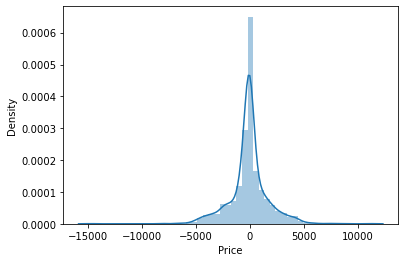

In [86]:
sns.distplot(y_test-y_pred)

In [87]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1118.795148161826
MSE: 3141129.274980343
RMSE: 1772.3231293927026


In [88]:
metrics.r2_score(y_test, y_pred)

0.8324400007559805

### Hyperprameter Tuning

In [89]:
from sklearn.model_selection import RandomizedSearchCV

In [90]:
hparams_rf = {'n_estimators':[100,2000,10],
              'criterion':['gini','entropy'],
             'max_depth':[100,2000,10],
             'min_samples_split':[2,4,6,8,10,12,14],
             'min_samples_leaf':[1,3,5,7,8,10]}
print(hparams_rf)

{'n_estimators': [100, 2000, 10], 'criterion': ['gini', 'entropy'], 'max_depth': [100, 2000, 10], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14], 'min_samples_leaf': [1, 3, 5, 7, 8, 10]}


In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf2 = RandomForestClassifier()
rs1 = RandomizedSearchCV(estimator=rf2,param_distributions=hparams_rf,
                         scoring='accuracy',verbose=2,n_iter=10,cv=5)
rs1.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   7.9s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   7.7s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   7.4s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   7.4s
[CV] END criterion=gini, max_depth=10, min_samples_leaf=5, min_samples_split=6, n_estimators=100; total time=   7.2s
[CV] END criterion=entropy, max_depth=2000, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END criterion=entropy, max_depth=2000, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END criterion=entropy, max_depth=2000, min_samples_leaf=7, min_samples_split=2, n_estimators=10; total time=   0.9s
[CV] END criterion=entropy, max_depth=2000, min_samp

C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\sunny\AppData\Roaming\Python\Python39\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [100, 2000, 10],
                                        'min_samples_leaf': [1, 3, 5, 7, 8, 10],
                                        'min_samples_split': [2, 4, 6, 8, 10,
                                                              12, 14],
                                        'n_estimators': [100, 2000, 10]},
                   scoring='accuracy', verbose=2)

In [93]:
print(rs1.best_params_)

{'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_depth': 100, 'criterion': 'gini'}


In [94]:
prediction=rs1.predict(x_test)

<Figure size 1440x1440 with 0 Axes>

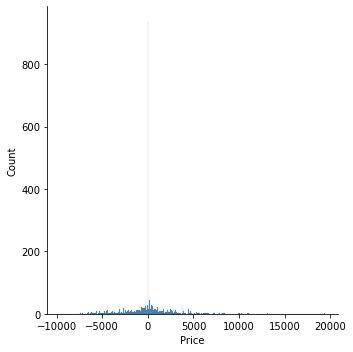

In [95]:
plt.figure(figsize=(20,20))
sns.displot(y_test-prediction)
plt.show()

In [98]:
train_score_rf = regressor.score(x_train,y_train)
test_score_rf = regressor.score(x_test,y_test)
print("Train Score for",regressor,"is",train_score_rf)
print("Test Score for",regressor,"is",test_score_rf)

Train Score for RandomForestRegressor() is 0.9507092041492162
Test Score for RandomForestRegressor() is 0.9506934324919383


In [100]:
result1 = pd.DataFrame({'Model':'Random_Forest_Regressor',"Train Score":train_score_rf,
                        },index=[1])